In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

In [2]:
class AgentState(TypedDict):
    n1: int
    n2: int
    operator1: str
    r1: int
    n3: int
    n4: int
    operator2: str
    r2: int

In [3]:
def addition1(state: AgentState) -> AgentState:
    """Adding 2 numbers"""
    state["r1"] = state["n1"] + state["n2"]
    return state

def subtraction1(state: AgentState) -> AgentState:
    """Substracting 2 numbers"""
    state["r1"] = state["n1"] - state["n2"]
    return state

def addition2(state: AgentState) -> AgentState:
    """Adding 2 numbers"""
    state["r2"] = state["n3"] + state["n4"]
    return state

def subtraction2(state: AgentState) -> AgentState:
    """Substracting 2 numbers"""
    state["r2"] = state["n3"] - state["n4"]
    return state

def router1(state: AgentState) -> AgentState:
    """Router for selecting the next subsequent node"""
    if state["operator1"] == "+":
        return "addition_operation1"
    elif state["operator1"] == "-":
        return "subtraction_operation1"

def router2(state: AgentState) -> AgentState:
    """Router for selecting the next subsequent node"""
    if state["operator2"] == "+":
        return "addition_operation2"
    elif state["operator2"] == "-":
        return "subtraction_operation2"

In [4]:
graph = StateGraph(AgentState)

In [5]:
graph.add_node("add1", addition1)
graph.add_node("sub1", subtraction1)
graph.add_node("add2", addition2)
graph.add_node("sub2", subtraction2)
graph.add_node("router1", lambda state: state)
graph.add_node("router2", lambda state: state)

In [6]:
graph.add_edge(START, "router1")
graph.add_conditional_edges("router1", router1, {"addition_operation1": "add1", "subtraction_operation1": "sub1"})
graph.add_edge("add1", "router2")
graph.add_edge("sub1", "router2")
graph.add_conditional_edges("router2", router2, {"addition_operation2": "add2", "subtraction_operation2": "sub2"})
graph.add_edge("add2", END)
graph.add_edge("sub2", END)
app = graph.compile()

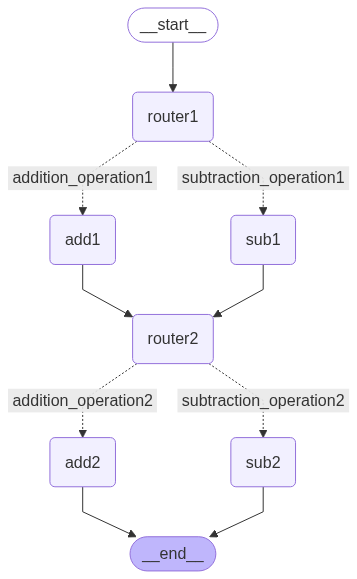

In [7]:
display(Image(app.get_graph().draw_mermaid_png()))

In [8]:
result = app.invoke({"n1": 10, "n2": 5, "operator1": "+", "n3": 10, "n4": 5, "operator2": "-"})

In [9]:
result

{'n1': 10,
 'n2': 5,
 'operator1': '+',
 'r1': 15,
 'n3': 10,
 'n4': 5,
 'operator2': '-',
 'r2': 5}